In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(<matplotlib.axes._subplots.AxesSubplot at 0x24da62d5e50>,
 <matplotlib.image.AxesImage at 0x24da60799a0>)

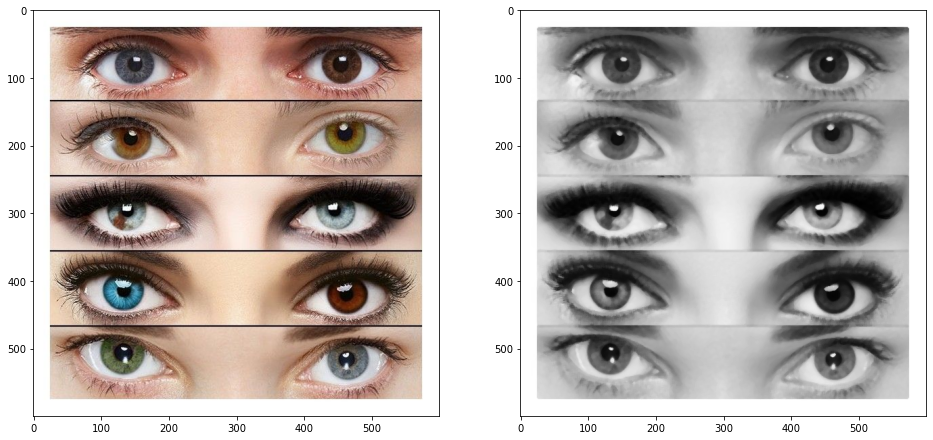

In [16]:
img_original = cv2.imread('./images/eyes.jpg')

gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)

fig, axs = plt.subplots(1, 3,figsize=(16,8))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img_original,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2), plt.imshow(gray,cmap = 'gray')

In [60]:
def get_distance(x,y):
    return np.sqrt(x**2+y**2)

def pairwise(iterable):
    "s -> (s0, s1), (s2, s3), (s4, s5), ..."
    a = iter(iterable)
    return zip(a, a)


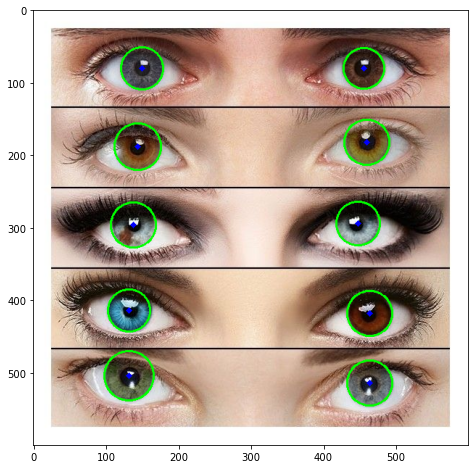

In [91]:
img_out = img_original.copy()
img_out = cv2.cvtColor(img_out,cv2.COLOR_BGR2RGB)

# HoughCircles parameters
dp = 1                        # Inverse ratio of the accumulator resolution to the image resolution
min_dist = 50                 # Minimum distance between the centers of the detected circles
canny_max_threshold = 250     # Higher threshold of the two passed to the Canny edge detector and the lower one is twice smaller (for HOUGH_GRADIENT)
threshold = 20                # Accumulator threshold for the circle centers at the detection stage (for HOUGH_GRADIENT)
min_rad = 20                  # Minimum circle radius
max_radius = 50               # Maximum circle radius

# Get circles
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,dp,minDist=min_dist,
                              param1=canny_max_threshold,param2=threshold,minRadius=min_rad,maxRadius=max_radius)
circles =  np.squeeze(np.uint16(np.around(circles)))

# Sort circles by "y" center coordinate
circles = circles[circles[:, 1].argsort()]

# Group circles by pair of eyes
iris_pair = []
for eye1, eye2 in pairwise(circles):
    iris_pair.append((eye1,eye2))
iris_pair = np.array(iris_pair)

# for c in circles: # c = [x,y,radius]     
#      cv2.circle(img_out,(c[0],c[1]),c[2],(0,255,0),2) # Draw the outer circle   
#      cv2.circle(img_out,(c[0],c[1]),2,(0,0,255),3) # Draw the center of the circle

for iris in iris_pair:   # iris = [[x1,y1,radius1],[x2,y2,radius2]]
     for eye in iris:    # eye = [x,y,radius]
          cv2.circle(img_out,(eye[0],eye[1]),eye[2],(0,255,0),2) # Draw the outer circle   
          cv2.circle(img_out,(eye[0],eye[1]),2,(0,0,255),3)      # Draw the center of the circle

fig = plt.figure(figsize=(16,8)), plt.imshow(img_out)